In [1]:
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from git_root import git_root

In [2]:
# Taken from 
# https://matplotlib.org/stable/gallery/statistics/customized_violin.html#violin-plot-customization
def set_axis_style(ax, labels):
    ax.set_xticks(np.arange(1, len(labels) + 1), labels=labels)
    ax.set_xlim(0.25, len(labels) + 0.75)
    ax.set_xlabel('Sample name')

# Load the data

In [3]:
df = pd.read_csv(Path(git_root()) / "data" / "risotto.csv")
df.head()

,Unnamed: 0,age,nationality,chef_rating,gas_stove,mu,stirring,treatment_effect,payment
0,0,50.77,Indonesia,0.55,0,15.814523,0,0.648323,15.814523
1,1,59.48,Indonesia,0.87,1,26.272818,1,0.469564,26.742381
2,2,47.25,Iraq,0.64,0,31.254842,1,0.562353,31.817196
3,3,22.21,Iraq,0.62,1,27.733472,1,0.571298,28.304770
4,4,100.40,Iceland,0.39,0,1.000000,1,-0.018184,0.981816


# Investigate outcome

Text(0.5, 0, 'payment')

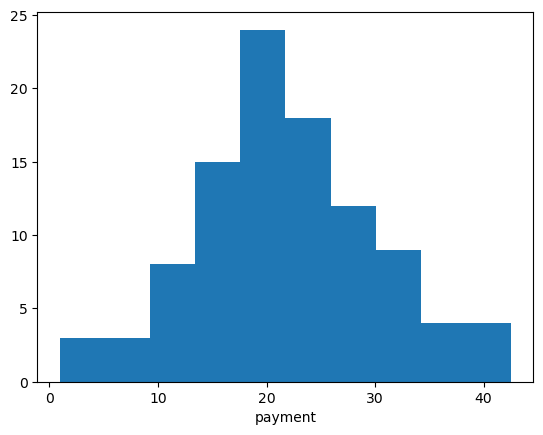

In [4]:
fig, ax = plt.subplots()
ax.hist(df["payment"])
ax.set_xlabel("payment")

Text(0, 0.5, 'payment')

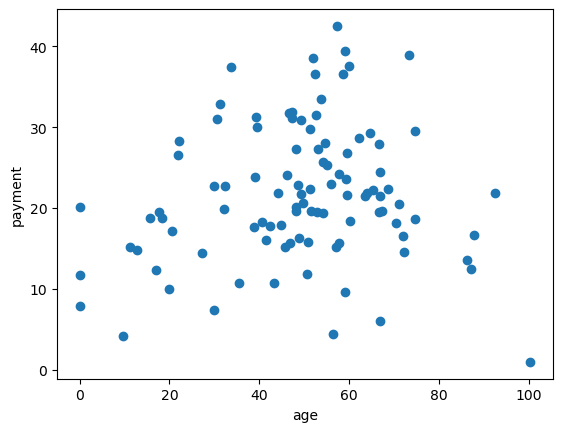

In [5]:
fig, ax = plt.subplots()
ax.scatter(df["age"], df["payment"])
ax.set_xlabel("age")
ax.set_ylabel("payment")

Text(0, 0.5, 'payment')

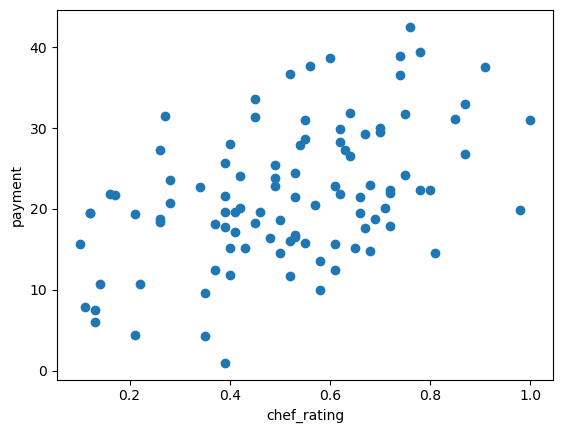

In [6]:
fig, ax = plt.subplots()
ax.scatter(df["chef_rating"], df["payment"])
ax.set_xlabel("chef_rating")
ax.set_ylabel("payment")

Text(0, 0.5, 'payment')

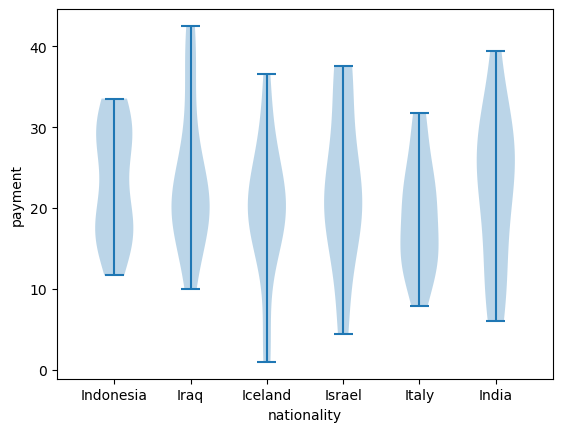

In [7]:
nationalities = df["nationality"].unique()
data = [
    df[df["nationality"] == nationality]["payment"].values for nationality in nationalities
]

fig, ax = plt.subplots()
ax.violinplot(dataset = data)
set_axis_style(ax, nationalities)
ax.set_xlabel("nationality")
ax.set_ylabel("payment")

Text(0, 0.5, 'payment')

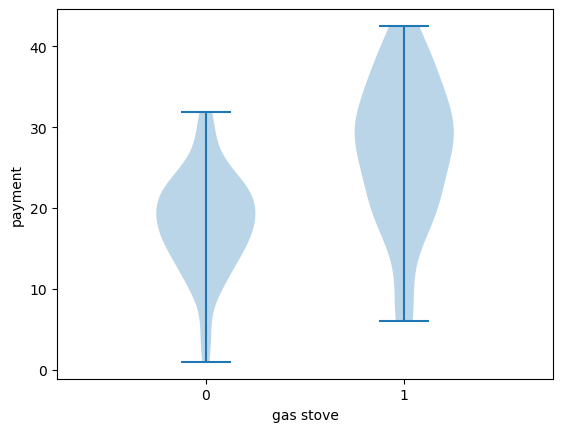

In [8]:
gas_stoves = df["gas_stove"].unique()
data = [
    df[df["gas_stove"] == gas_stove]["payment"].values for gas_stove in gas_stoves
]

fig, ax = plt.subplots()
ax.violinplot(dataset = data)
set_axis_style(ax, gas_stoves)
ax.set_xlabel("gas stove")
ax.set_ylabel("payment")

# Investigate treatment assignment

In [10]:
df["stirring"].value_counts()

1    53
0    47
Name: stirring, dtype: int64

In [ ]:
df_bins = df.copy()
df_bins["bin"] = pd.cut(df["chef_rating"], bins=5)
aux = df_bins.groupby("bin")["stirring"].mean()
fig, ax = plt.subplots()
aux.plot.bar(ax=ax)
ax.set_xlabel("chef rating")
ax.set_ylabel("probability of stirring")

# Investigate treatment effect

Text(0.5, 0, 'treatment effect')

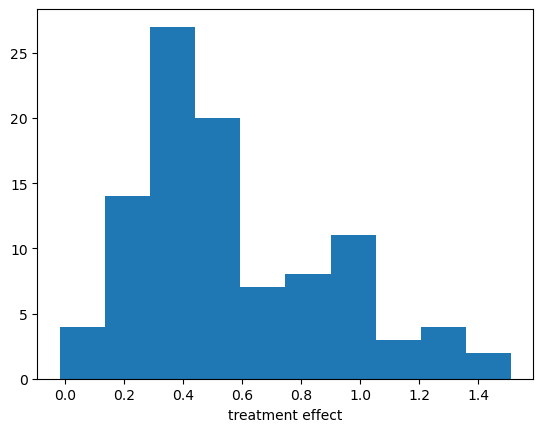

In [11]:
fig, ax = plt.subplots()
ax.hist(df["treatment_effect"])
ax.set_xlabel("treatment effect")